In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm
from a2_1 import rng,box_muller,romber_int,ridders_diff
import a2_4 as a4

In [22]:
print('--- Exercise 4 ---')
seed = 627310980
rng = a4.rng(seed)
print('Original seed:',seed)
# --- 4.a ---
# Setting the constants
omega_m = 0.3
omega_lambda = 0.7
H0 = 70 # km/s/Mpc
# Setting the functions
H = lambda a : H0*((omega_m*(a)**(-3)+omega_lambda))**0.5
D_prefactor = lambda a : (5*omega_m*H0**2)/2*H(a)
dIda = lambda a: 1/(a*H(a))**3
I = lambda a: a4.romber_int(dIda,1e-12,a)
a = 1/51
D = lambda a: D_prefactor(a) * I(a)
print(f'The linear growth factor at z = 50 (a = 1/51) is equal to: {D(a)}')

# --- 4.b --- 
# Setting the functions
pre_fact = lambda a: 5*omega_m*H0**3/(2*a**(0.5)) 
dHda = lambda a: -3*omega_m/(2*(a**5*(omega_m+omega_lambda*a**3))**0.5)
dDdt = lambda a: pre_fact(a)*(dHda(a)*I(a)+dIda(a)*H(a))
dDdt_numerical = a4.ridders_diff(D,np.array([a]))*H0/(a)**0.5
print(f' The analytical value of time derivative of D(z) at z = 50 : {dDdt}')
print(f' The numerical value of time derivative of D(z) at z = 50 : {dDdt_numerical}')

--- Exercise 4 ---
Original seed: 627310980
The linear growth factor at z = 50 (a = 1/51) is equal to: 0.01961021426458253
 The analytical value of time derivative of D(z) at z = 50 : <function <lambda> at 0x7ff15f47a9d8>
 The numerical value of time derivative of D(z) at z = 50 : [499.95564708]


In [23]:
N = 64
a = np.linspace(0.0025,1,90)
Da = np.zeros(len(a))

# 2D - Generating S for the x and y dimensions in the Fourier plane
Sx,Sy = a4.random_field_generator_zeld(N,rng)
Sx = np.fft.ifft2(Sx).real*N
Sy = np.fft.ifft2(Sy).real*N

# Setting the starting coordinates
q = np.zeros((N,N,2))
for i in range(len(q)):
    for j in range(len(q)):
        q[i][j] = i,j

da = a[1]-a[0]
p = lambda a,S : -1*(a-da/2)**2*dDdt(a-da/2)*S
Py = np.zeros((len(a),10))
Xy = np.zeros((len(a),10))

# Iterating through all the a values
x2D = np.zeros((N,N,2))
for k in tqdm(range(0,90)):
    # Calculating D and D*S
    Da[k] = D(a[k])
    DSx = Da[k]*Sx
    DSy = Da[k]*Sy 
    # Calculating the new x positions
    x2D[:,:,0] = (q[:,:,0]+DSx)%N
    x2D[:,:,1] = (q[:,:,1]+DSy)%N
    # Saving for the plot
    Xy[k] = x2D[:10,0,1]
    #print(Sy[:10,0])
    Py[k] = p(a[k],Sy[:10,0])
    # Plotting
    plt.scatter(x2D[:,:,0],x2D[:,:,1],marker='.')
    plt.title('2D N-body simulation')
    plt.ylabel('Mpc')
    plt.xlabel(f'a = {np.round(a[k],3)}')
    plt.savefig('./plots/2Dmovie/snap%04d.png'%k)
    plt.close()

print('2D N-body simulation completed')

/net/student50/data1/MRP1/numerical_recipes/a2/a2_1.py:22: RuntimeWarning: overflow encountered in long_scalars
  self.state = self.a*(x&(2**32-1))+(x>>32)
  0%|          | 0/90 [00:00<?, ?it/s]/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
100%|██████████| 90/90 [00:13<00:00,  6.05it/s]

2D N-body simulation completed


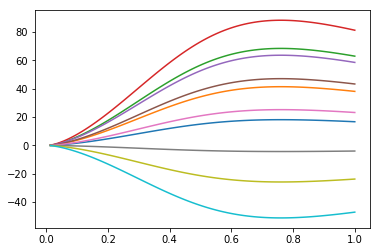

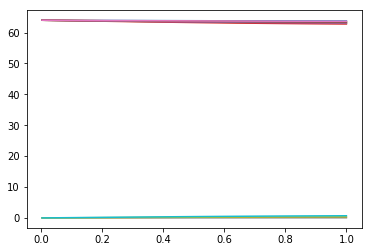

In [26]:
plt.plot(a,Py)
plt.show()
plt.plot(a,Xy)
plt.show()